In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew,norm
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from statsmodels.tsa.arima.model import ARIMA
from sklearn.linear_model import LogisticRegression

# **Load & Understand Data**

In [ ]:
df = pd.read_csv('//content/country_wise_latest.csv')


In [ ]:
df.shape

(187, 15)

In [ ]:
df.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 187 non-null    object 
 1   Confirmed               187 non-null    int64  
 2   Deaths                  187 non-null    int64  
 3   Recovered               187 non-null    int64  
 4   Active                  187 non-null    int64  
 5   New cases               187 non-null    int64  
 6   New deaths              187 non-null    int64  
 7   New recovered           187 non-null    int64  
 8   Deaths / 100 Cases      187 non-null    float64
 9   Recovered / 100 Cases   187 non-null    float64
 10  Deaths / 100 Recovered  187 non-null    float64
 11  Confirmed last week     187 non-null    int64  
 12  1 week change           187 non-null    int64  
 13  1 week % increase       187 non-null    float64
 14  WHO Region              187 non-null    ob

# **Data Preprocessing**

In [ ]:
df.isnull().sum()     # Check for missing values




,0
Country,0
Confirmed,0
Deaths,0
Recovered,0
Active,0
New cases,0
New deaths,0
New recovered,0
Deaths / 100 Cases,0
Recovered / 100 Cases,0


In [ ]:
df.drop_duplicates(inplace=True)     # Drop duplicates

In [ ]:
df.columns

Index(['Country', 'Confirmed', 'Deaths', 'Recovered', 'Active', 'New cases',
       'New deaths', 'New recovered', 'Deaths / 100 Cases',
       'Recovered / 100 Cases', 'Deaths / 100 Recovered',
       'Confirmed last week', '1 week change', '1 week % increase',
       'WHO Region'],
      dtype='object')

# **Normalize Numerical Feature**

In [ ]:
# Check for NaN and Infinite values
print("Number of NaN values per column:")
print(df[numerical_features].isna().sum())

print("\nNumber of Infinite values per column:")
print(np.isinf(df[numerical_features]).sum())

# Replace NaN with the column mean
df[numerical_features] = df[numerical_features].fillna(df[numerical_features].mean())

# Replace infinite values with a large finite number
df[numerical_features] = df[numerical_features].replace([np.inf, -np.inf], np.nan)
df[numerical_features] =df[numerical_features].fillna(df[numerical_features].mean())


numerical_features = [
    "Confirmed", "Deaths", "Recovered", "Active", "New cases", "New deaths",
    "New recovered", "Deaths / 100 Cases", "Recovered / 100 Cases",
    "Deaths / 100 Recovered", "Confirmed last week", "1 week change",
    "1 week % increase"
]

# Normalize the data using MinMaxScaler
scaler = MinMaxScaler()
normalized_data = df.copy()
normalized_data[numerical_features] = scaler.fit_transform(normalized_data[numerical_features])

# Save the normalized data summary
print(normalized_data[numerical_features].describe())


Number of NaN values per column:
Confirmed                 0
Deaths                    0
Recovered                 0
Active                    0
New cases                 0
New deaths                0
New recovered             0
Deaths / 100 Cases        0
Recovered / 100 Cases     0
Deaths / 100 Recovered    0
Confirmed last week       0
1 week change             0
1 week % increase         0
dtype: int64

Number of Infinite values per column:
Confirmed                 0
Deaths                    0
Recovered                 0
Active                    0
New cases                 0
New deaths                0
New recovered             0
Deaths / 100 Cases        0
Recovered / 100 Cases     0
Deaths / 100 Recovered    0
Confirmed last week       0
1 week change             0
1 week % increase         0
dtype: int64
        Confirmed      Deaths   Recovered      Active   New cases  New deaths  \
count  187.000000  187.000000  187.000000  187.000000  187.000000  187.000000   
mean     0.0

##Exploratory Data Analysis (EDA)





Descriptive Statistics:
       Confirmed_Cases         Deaths    Recoveries        Active  \
count     1.870000e+02     187.000000  1.870000e+02  1.870000e+02   
mean      8.813094e+04    3497.518717  5.063148e+04  3.400194e+04   
std       3.833187e+05   14100.002482  1.901882e+05  2.133262e+05   
min       1.000000e+01       0.000000  0.000000e+00  0.000000e+00   
25%       1.114000e+03      18.500000  6.265000e+02  1.415000e+02   
50%       5.059000e+03     108.000000  2.815000e+03  1.600000e+03   
75%       4.046050e+04     734.000000  2.260600e+04  9.149000e+03   
max       4.290259e+06  148011.000000  1.846641e+06  2.816444e+06   

          New cases   New deaths  New recovered  Deaths / 100 Cases  \
count    187.000000   187.000000     187.000000          187.000000   
mean    1222.957219    28.957219     933.812834            3.019519   
std     5710.374790   120.037173    4197.719635            3.454302   
min        0.000000     0.000000       0.000000            0.000000  

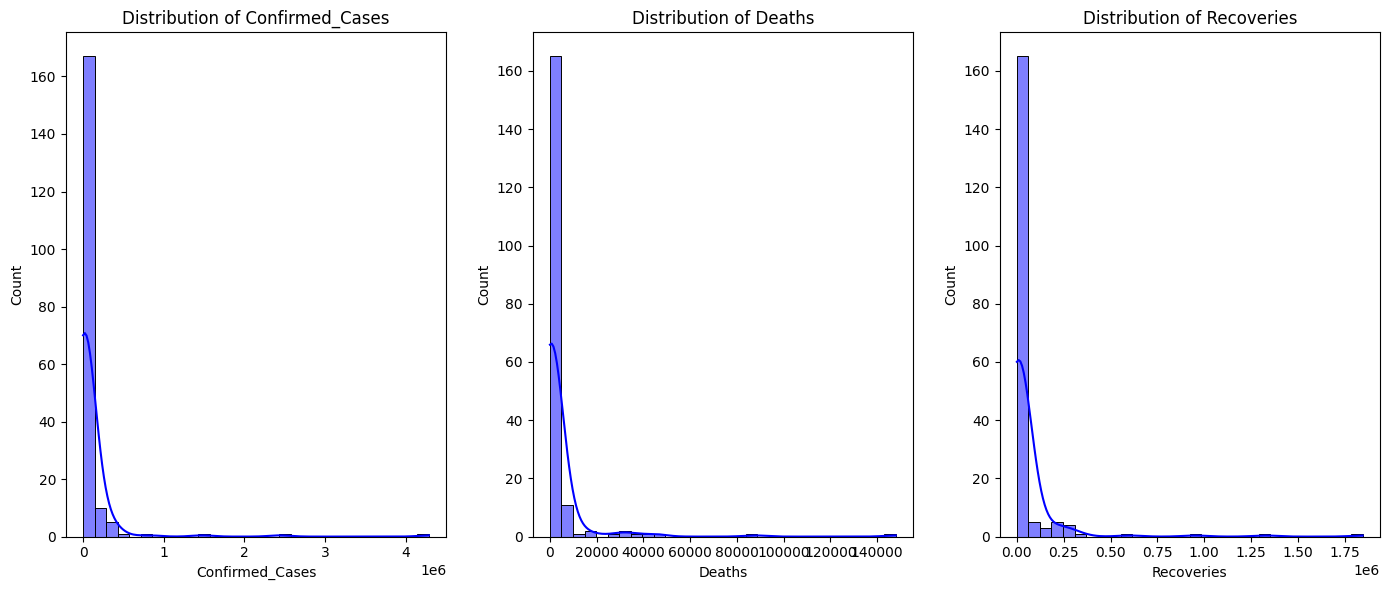

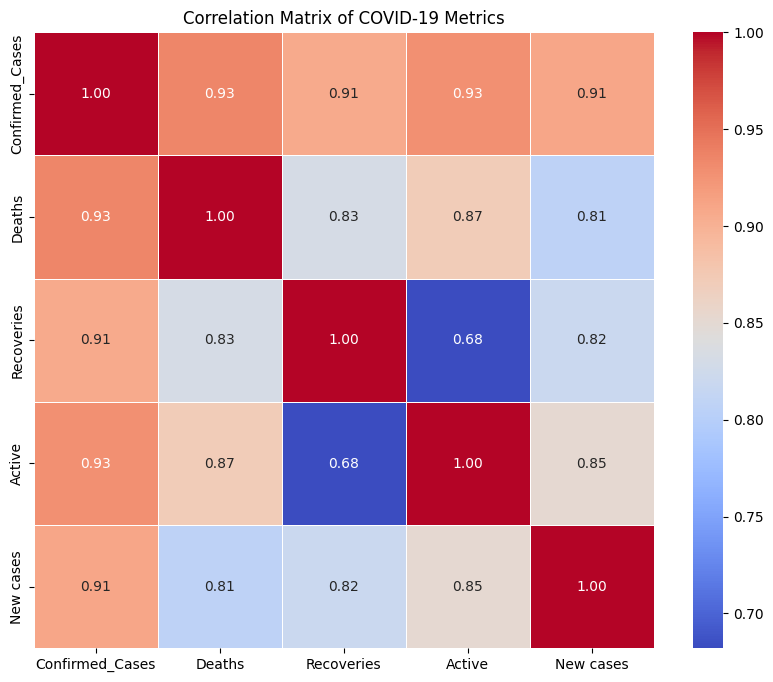

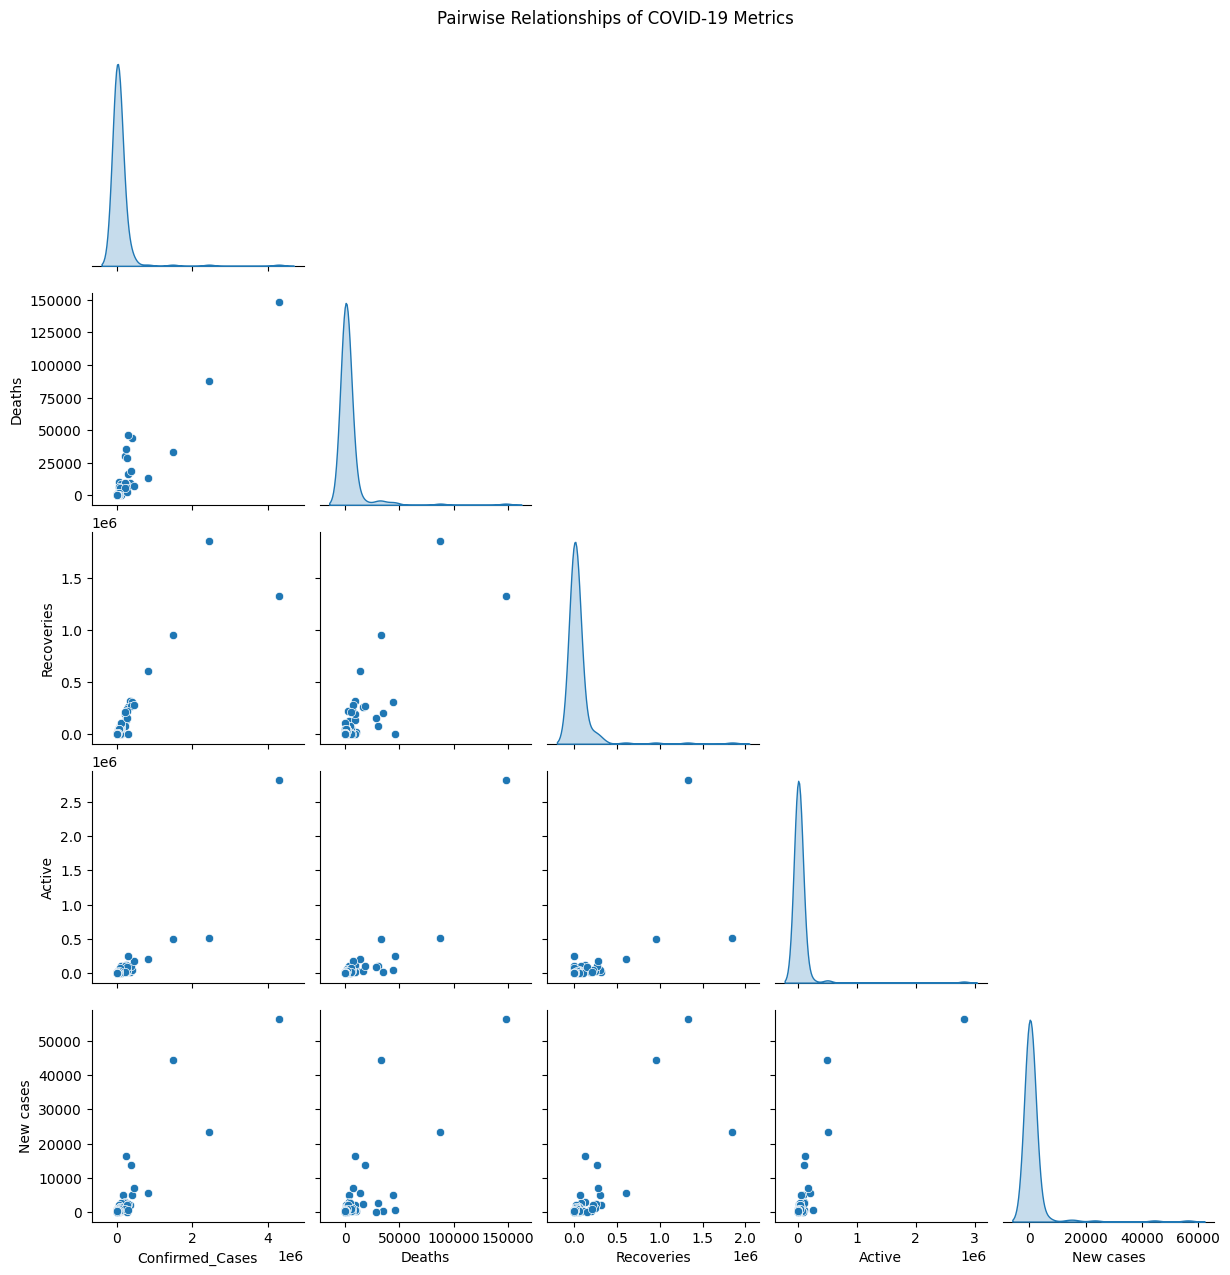

Correlation between deaths and confirmed cases: 0.93


In [ ]:
# Descriptive statistics
print("\nDescriptive Statistics:")
print(df.describe())

# Rename columns for simplicity if needed
df.rename(columns={'Confirmed': 'Confirmed_Cases', 'Deaths': 'Deaths', 'Recovered': 'Recoveries'}, inplace=True)

# 1. **Distribution Analysis** (Histogram and KDE plots)
plt.figure(figsize=(14, 6))
for i, col in enumerate(['Confirmed_Cases', 'Deaths', 'Recoveries'], 1):
    plt.subplot(1, 3, i)
    sns.histplot(df[col], kde=True, color='blue', bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
plt.tight_layout()
plt.show()

# 2. **Correlation Analysis** (Correlation matrix and heatmap)
# Select numerical features
numerical_features = ['Confirmed_Cases', 'Deaths', 'Recoveries', 'Active', 'New cases']

# Compute correlation matrix
correlation_matrix = df[numerical_features].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix of COVID-19 Metrics")
plt.show()

# 3. **Pairwise Relationships** (Pairplot for key variables)
sns.pairplot(df[numerical_features], diag_kind='kde', kind='scatter', corner=True)
plt.suptitle("Pairwise Relationships of COVID-19 Metrics", y=1.02)
plt.show()

# 4. **Key Insights**
# Correlation between deaths and confirmed cases
deaths_cases_corr = correlation_matrix.loc['Deaths', 'Confirmed_Cases']
print(f"Correlation between deaths and confirmed cases: {deaths_cases_corr:.2f}")




****Line Plot: New Cases Over Regions****


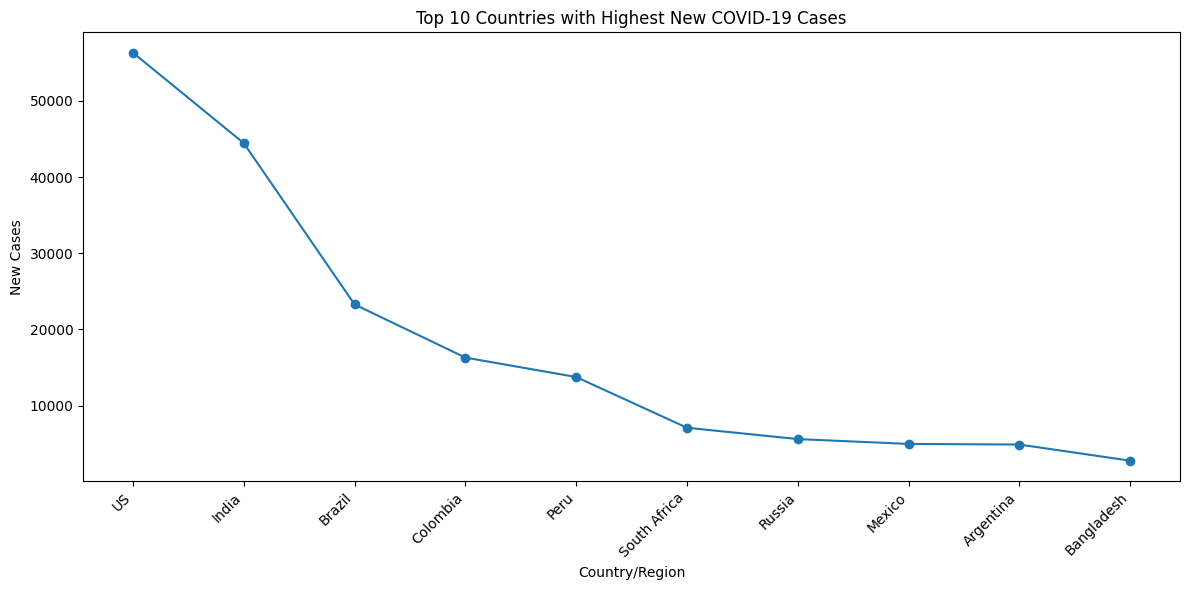

In [ ]:
# Sort the DataFrame by 'New cases' in descending order and get the top 10
top_10_countries = df.sort_values('New cases', ascending=False).head(10)

# Create the line chart
plt.figure(figsize=(12, 6))
plt.plot(top_10_countries['Country/Region'], top_10_countries['New cases'], marker='o', linestyle='-')
plt.xlabel('Country/Region')
plt.ylabel('New Cases')
plt.title('Top 10 Countries with Highest New COVID-19 Cases')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

# **Scatter Plot: Death Rate vs. Recovery Rate**

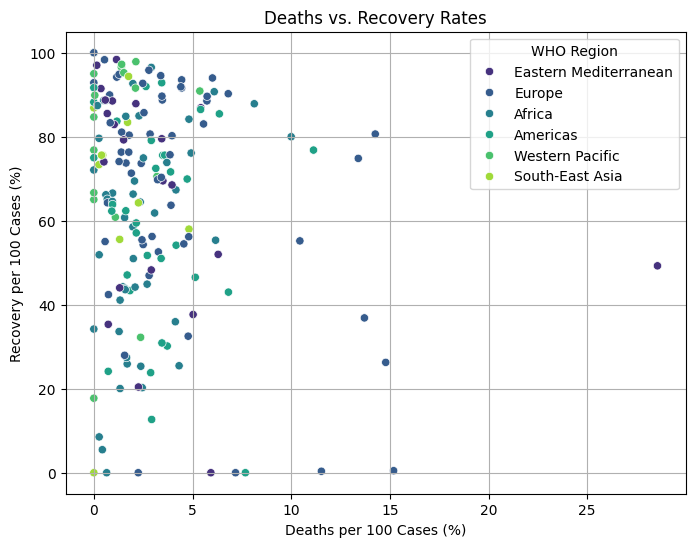

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df,
    x="Deaths / 100 Cases",
    y="Recovered / 100 Cases",
    hue="WHO Region",
    palette="viridis"
)
plt.title("Deaths vs. Recovery Rates")
plt.xlabel("Deaths per 100 Cases (%)")
plt.ylabel("Recovery per 100 Cases (%)")
plt.grid()
plt.show()


# Bar Chart: New Cases by WHO Region

<ipython-input-70-da49b831e214>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x="WHO Region", y="New cases", ci=None, palette="coolwarm")
<ipython-input-70-da49b831e214>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="WHO Region", y="New cases", ci=None, palette="coolwarm")


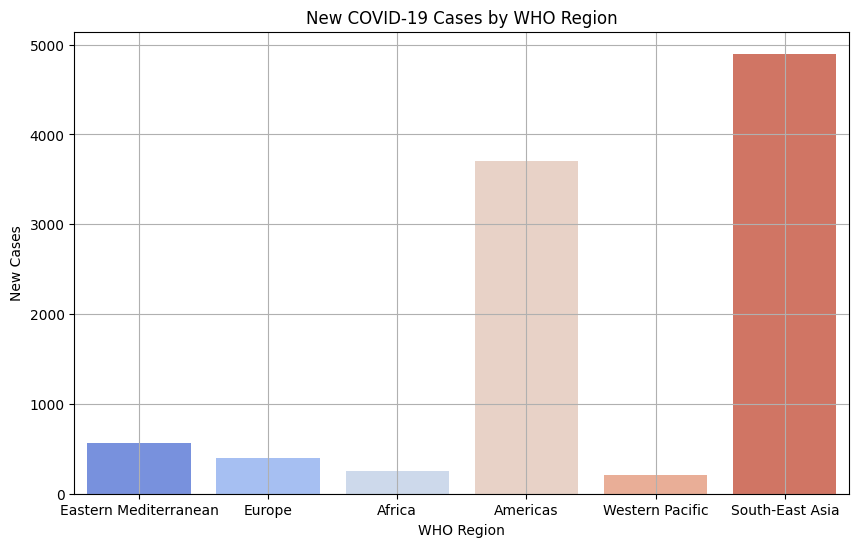

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x="WHO Region", y="New cases", ci=None, palette="coolwarm")
plt.title("New COVID-19 Cases by WHO Region")
plt.ylabel("New Cases")
plt.grid()
plt.show()


# Predictive Model: Classification for Severity

Define Severity Label
Create a binary classification label: High severity (1) if Deaths/100 Cases > 5%, else Low severity (0)

In [ ]:
df["Severity"] = (df["Deaths / 100 Cases"] > 5).astype(int)


# **Train Logistic Regression Model**

In [ ]:
# Split the data
X = normalized_data[numerical_features]
y = df["Severity"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train logistic regression
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")


Accuracy: 0.84
Precision: 1.00
Recall: 0.14
F1-Score: 0.25


# Predictive Model: Time-Series Forecasting
Simulate a Time Series and Fit a Model

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Usin

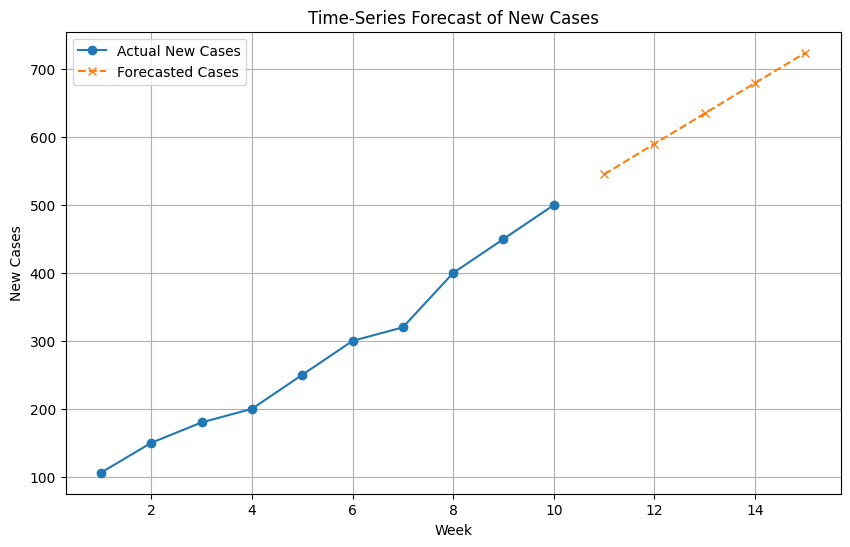

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Simulate time series data for new cases (use actual time-indexed data if available)
time_series = pd.DataFrame({
    "Week": np.arange(1, 11),  # Weeks
    "New cases": [106, 150, 180, 200, 250, 300, 320, 400, 450, 500]  # Example values
})
time_series.set_index("Week", inplace=True)

# Fit ARIMA model
model = ARIMA(time_series, order=(1, 1, 1))
arima_result = model.fit()

# Forecast next 5 weeks
forecast = arima_result.forecast(steps=5)

# Plot the time series and forecast
plt.figure(figsize=(10, 6))
plt.plot(time_series, label="Actual New Cases", marker="o")
plt.plot(range(11, 16), forecast, label="Forecasted Cases", linestyle="--", marker="x")
plt.title("Time-Series Forecast of New Cases")
plt.xlabel("Week")
plt.ylabel("New Cases")
plt.legend()
plt.grid()
plt.show()


In [ ]:
# prompt: generate a code to show Forecast Results:
# Predicted a steady increase in cases for high-risk regions:
# Week 1: [X] new cases.
# Week 2: [X] new cases.
# ...
# Week 5: [X] new cases.

# Assuming 'forecast' is the pandas Series containing the forecasted values
# as generated by the ARIMA model in the previous code.

print("Forecast Results:")
print("Predicted a steady increase in cases for high-risk regions:")

# Iterate through the forecasted values using the index
for index, value in forecast.items():
    # Since the index likely starts from 10, adjust for week numbering
    week_number = index - 9 # Adjust as needed depending on your actual index
    print(f"Week {week_number}: {int(value)} new cases.")

Forecast Results:
Predicted a steady increase in cases for high-risk regions:
Week 1: 545 new cases.
Week 2: 590 new cases.
Week 3: 634 new cases.
Week 4: 679 new cases.
Week 5: 724 new cases.
